# Data structures accepted by seaborn

In [2]:
import seaborn as sns

## Long-form vs. wide-form data
### Long-form data
- A long-form data table has the following characteristics:
+ Each variable is a column
+ Each observation is a row

In [3]:
flights = sns.load_dataset("flights")
flights.head(2)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118


In Seaborn, the `kind` parameter changes depending on the function you’re using.

**For `sns.relplot()`**

* `"scatter"`
* `"line"`

**For `sns.catplot()`**

* `"strip"`
* `"swarm"`
* `"box"`
* `"violin"`
* `"point"`
* `"bar"`

**For `sns.displot()`**

* `"hist"`
* `"kde"`
* `"ecdf"`


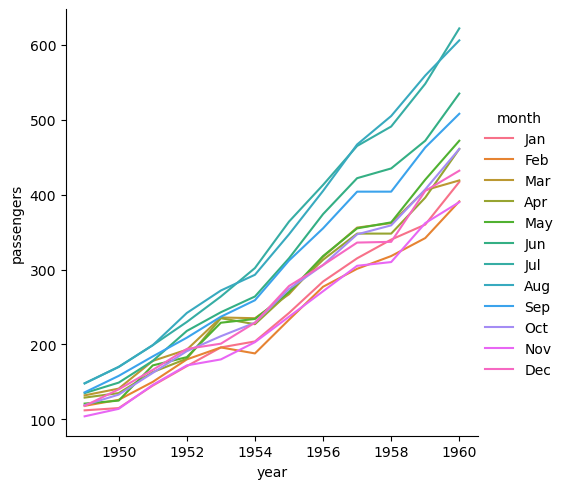

In [10]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line")

# Wide-form data

In [13]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head(2)

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140


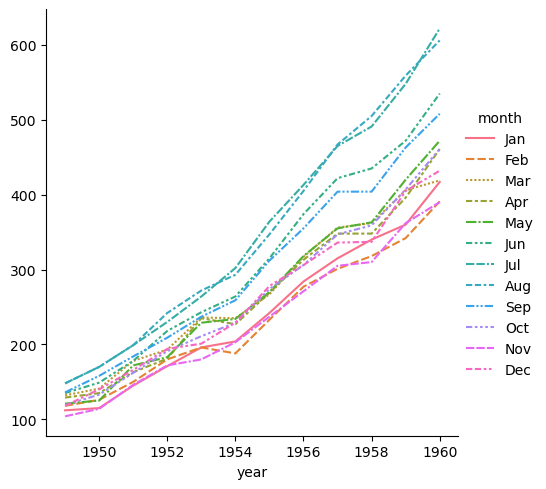

In [14]:
sns.relplot(data=flights_wide, kind="line")

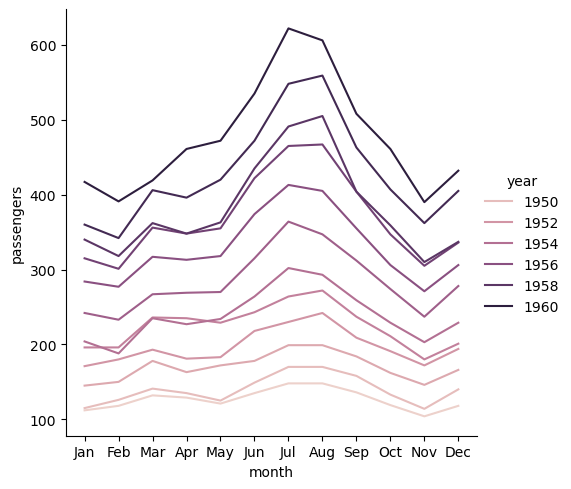

In [15]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

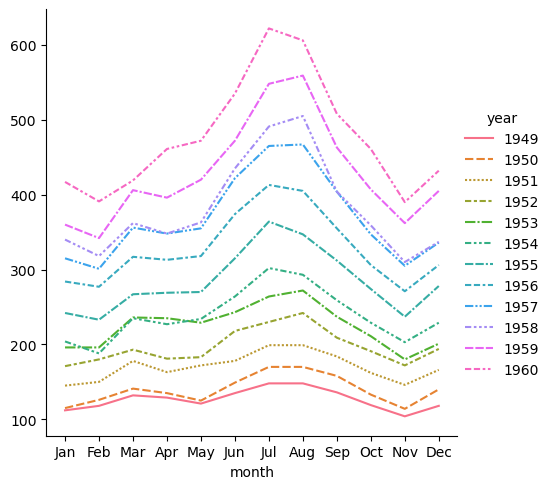

In [16]:
sns.relplot(data=flights_wide.transpose(), kind="line")

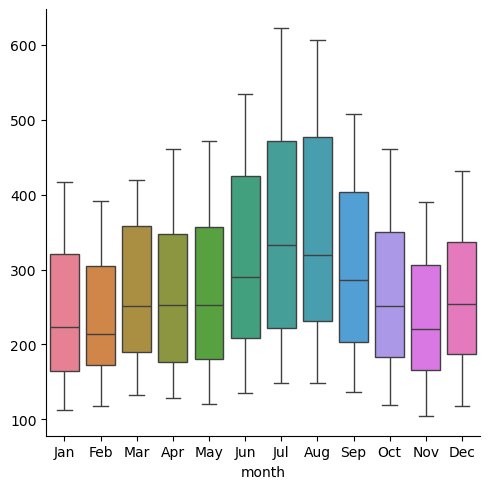

In [17]:
sns.catplot(data=flights_wide, kind="box")

# Messy data

In [19]:
anagrams = sns.load_dataset("anagrams")
anagrams.head(2)

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5


- Let’s transform it to a tidy long-form table, such that each variable is a column and each row is an observation. We can use the method pandas.DataFrame.melt() to accomplish this task:

In [20]:
anagrams_long = anagrams.melt(id_vars=["subidr", "attnr"], var_name="solutions", value_name="score")
anagrams_long.head()

,subidr,attnr,solutions,score
0,1,divided,num1,2.0
1,2,divided,num1,3.0
2,3,divided,num1,3.0
3,4,divided,num1,5.0
4,5,divided,num1,4.0


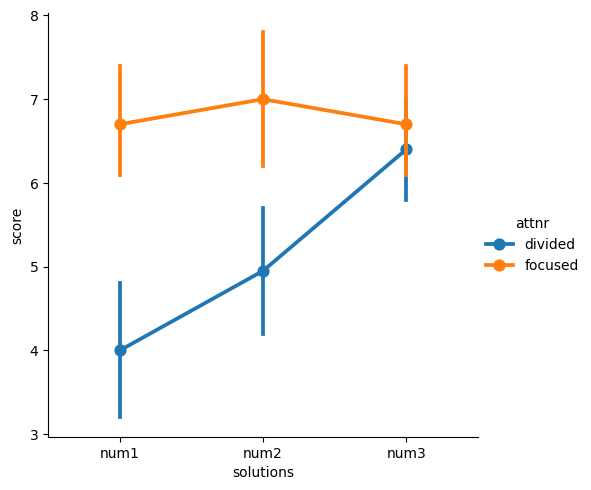

In [21]:
sns.catplot(data=anagrams_long, x="solutions", y="score", hue="attnr", kind="point")

## Options for visualizing long-form data

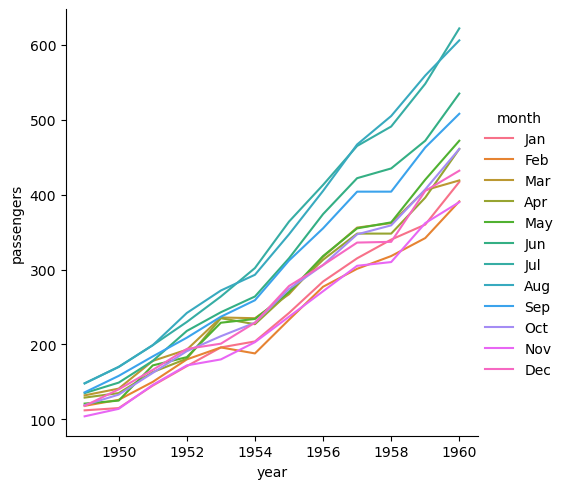

In [22]:
flights_dict = flights.to_dict()
sns.relplot(data=flights_dict, x="year", y="passengers", hue="month", kind="line")

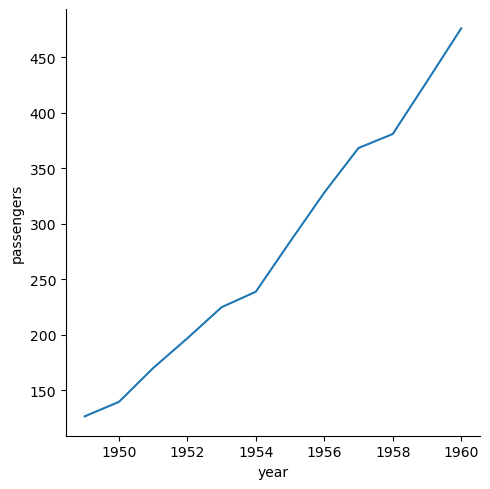

In [23]:
flights_avg = flights.groupby("year").mean(numeric_only=True)
sns.relplot(data=flights_avg, x="year", y="passengers", kind="line")

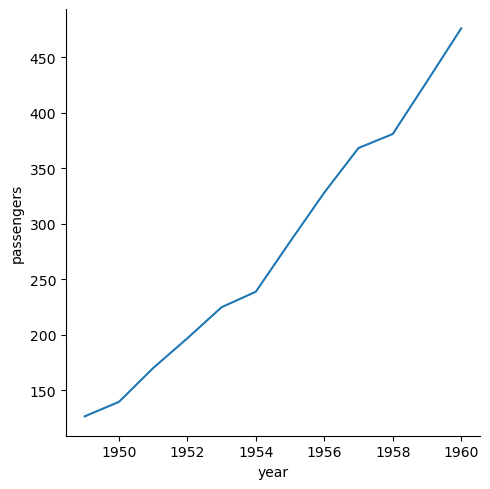

In [24]:
year = flights_avg.index
passengers = flights_avg["passengers"]
sns.relplot(x=year, y=passengers, kind="line")

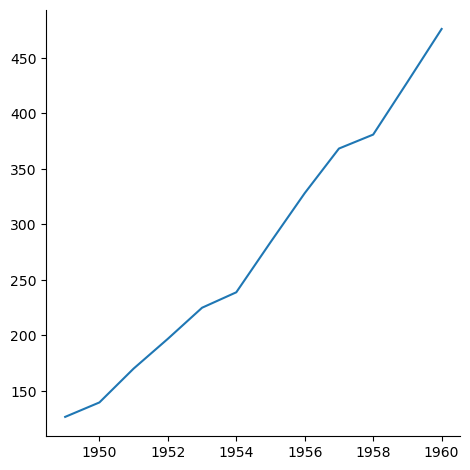

In [25]:
sns.relplot(x=year.to_numpy(), y=passengers.to_list(), kind="line")

# Options for visualizing wide-form data

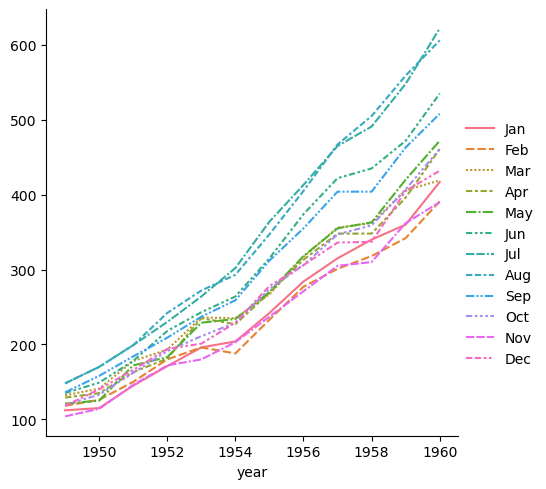

In [26]:
flights_wide_list = [col for _, col in flights_wide.items()]
sns.relplot(data=flights_wide_list, kind="line")

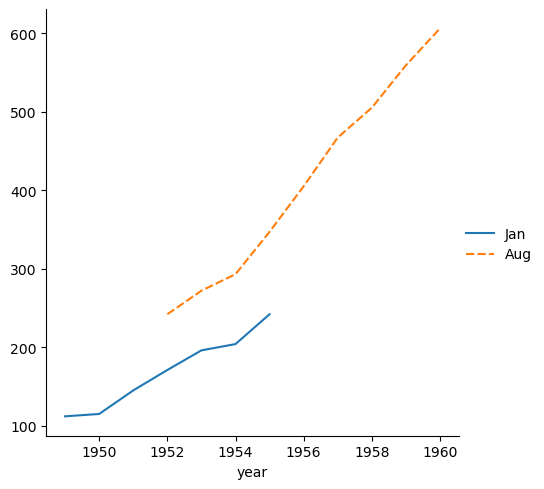

In [27]:
two_series = [flights_wide.loc[:1955, "Jan"], flights_wide.loc[1952:, "Aug"]]
sns.relplot(data=two_series, kind="line")

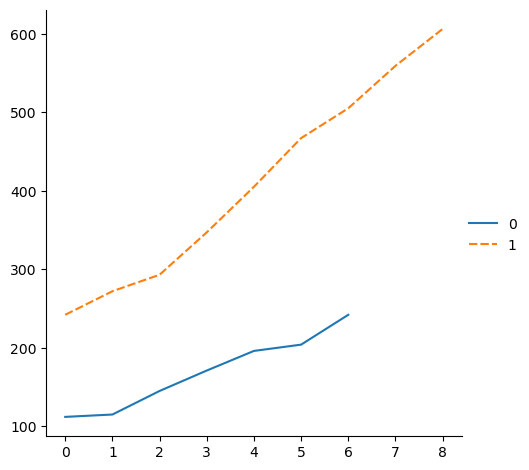

In [28]:
two_arrays = [s.to_numpy() for s in two_series]
sns.relplot(data=two_arrays, kind="line")

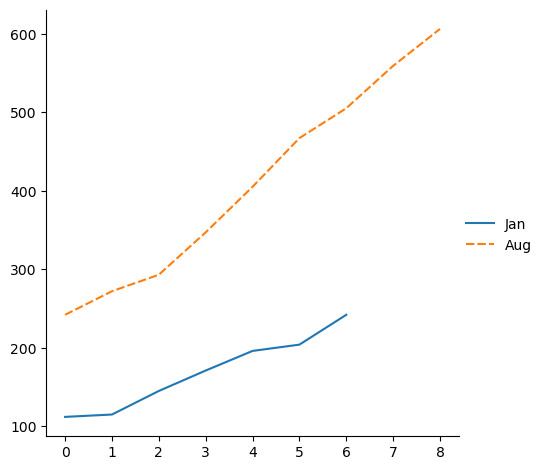

In [29]:
two_arrays_dict = {s.name: s.to_numpy() for s in two_series}
sns.relplot(data=two_arrays_dict, kind="line")

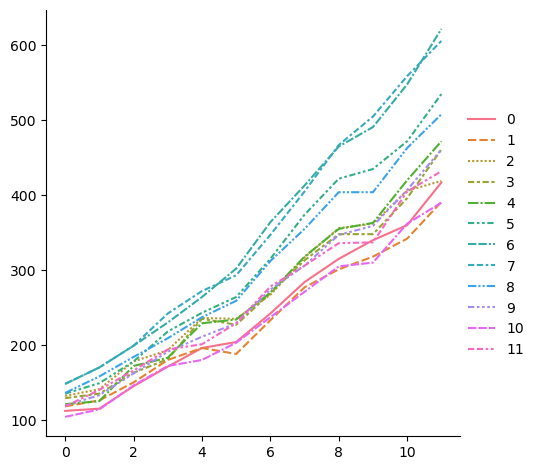

In [30]:
flights_array = flights_wide.to_numpy()
sns.relplot(data=flights_array, kind="line")